# Инициализация

In [24]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf '/content/neftekod_hack'
!git clone https://github.com/iliaNecrov/neftekod_hack

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'neftekod_hack'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 37 (delta 17), reused 22 (delta 8), pack-reused 0
Receiving objects: 100% (37/37), 5.12 MiB | 1.81 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (13/13), done.


In [1]:
# Покетики
import pandas as pd
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [25]:
try:
  df = pd.read_csv("/content/neftekod_hack/train_data_fix_concat.csv")
except:
  df = pd.read_csv("train_data_fix_concat.csv")

In [5]:
# try:
#   smiles = pd.read_csv("/content/neftekod_hack/smiles_train_set.csv")
# except:
#   smiles = pd.read_csv("smiles_train_set.csv")

# Изучение тестового датасета

In [26]:
df.isna().sum()

oil_type                            1943
blend_id                               0
oil_property_param_title               0
oil_property_param_value            2344
component_name                         0
component_class                   141105
polymer                           141105
component_property_param_title         0
component_property_param_value    238777
smiles                            141105
dtype: int64

<Axes: >

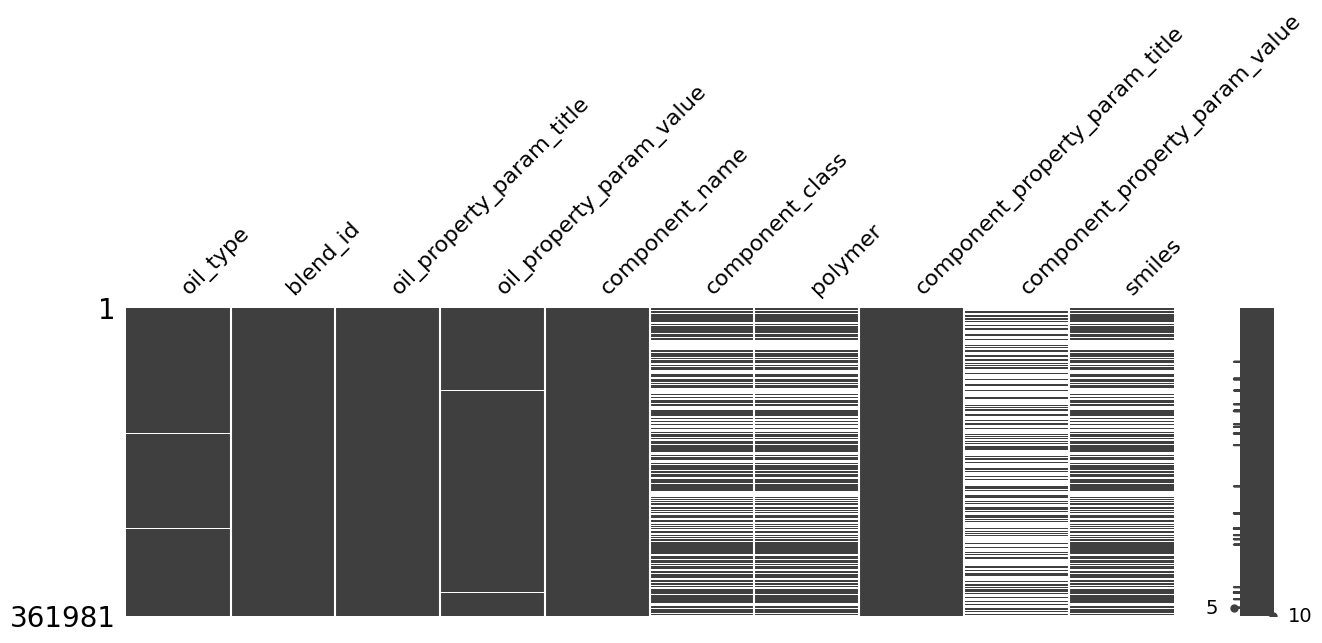

In [28]:
msno.matrix(df, figsize=(15,4))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361981 entries, 0 to 361980
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   oil_type                        360038 non-null  object 
 1   blend_id                        361981 non-null  object 
 2   oil_property_param_title        361981 non-null  object 
 3   oil_property_param_value        359637 non-null  float64
 4   component_name                  361981 non-null  object 
 5   component_type_title            361981 non-null  object 
 6   component_property_param_title  361981 non-null  object 
 7   component_property_param_value  123204 non-null  float64
dtypes: float64(2), object(6)
memory usage: 22.1+ MB


In [29]:
df.head(3).T

,0,1,2
oil_type,3fa07e0a-415c-496d-b88b-557855cb3e77,3fa07e0a-415c-496d-b88b-557855cb3e77,3fa07e0a-415c-496d-b88b-557855cb3e77
blend_id,49743a76-a614-11ee-9529-005056921581,49743a76-a614-11ee-9529-005056921581,49743a76-a614-11ee-9529-005056921581
oil_property_param_title,4c7a51f1-dc82-41dc-92fa-772535c2c70c,4c7a51f1-dc82-41dc-92fa-772535c2c70c,4c7a51f1-dc82-41dc-92fa-772535c2c70c
oil_property_param_value,15.58,15.58,15.58
component_name,615537f6-1f8f-4240-a5e9-8f7be344ecd3,615537f6-1f8f-4240-a5e9-8f7be344ecd3,615537f6-1f8f-4240-a5e9-8f7be344ecd3
component_class,базовое масло 1 гр,базовое масло 1 гр,базовое масло 1 гр
polymer,no,no,no
component_property_param_title,02236ee6-5eec-4368-a2e4-6f2e73fb0f96,2511714c-ab50-4566-bc92-8e4095d87d01,38b06d9a-bcf2-40de-8e1b-9c3988c42406
component_property_param_value,0.0,0.0,0.0001
smiles,CCCCC,CCCCC,CCCCC


In [32]:
df.drop(index=df[df.duplicated()].index, inplace=True)

In [33]:
df["smiles"].value_counts()

smiles
CCCC(C)CCC                                                                   37716
CCC(C(OC)=O)CC                                                               29082
CCCCC                                                                        20055
CCCCC(C)C                                                                    18453
CCC(C)CCCC                                                                   15393
CC(C)CCCCC                                                                   13536
CCC(C)(C)CC                                                                  10964
CC(C)(C)CC(C)(C)C                                                             7770
CCCCCCC                                                                       6985
CC(C(OCCCC)=O)C(OCCCC)=O                                                      5208
CCCCCCCCC(CCCCCC)CC(C)CCCCCCCC                                                4488
CC(C)(CC(C)C1=CC=CC=C1)C(OC)=O                                                24

In [34]:
df['blend_id'].value_counts()

blend_id
5b7e51f2-795f-11ee-9355-005056921581    6950
e7e69f08-797f-11ee-9355-005056921581    5782
b6d34fba-853c-11ee-9d2f-005056921581    5451
cb95c1b4-5912-11ed-8a7d-005056921581    4669
77671ffa-3fec-11ed-8432-005056921581    3762
                                        ... 
d45e288e-f3e2-11ed-8a03-005056921581      52
310191d8-f3e9-11ed-8a03-005056921581      50
e640740e-6beb-11ee-9b39-005056921581      46
4b0b13c2-2fa0-11ee-97e5-005056921581      44
60ff9db8-426c-11ee-80bb-005056921581      42
Name: count, Length: 348, dtype: int64

341 уникальных смеси. Каждая смесь включает в себя несколько smiles.

In [35]:
df.groupby(['blend_id', 'smiles']).count()

oil_type  \
blend_id                             smiles                       
007b4d7a-b1f8-11ed-93b4-005056921581 CC(C)CCCCC             175   
                                     CCCC(C)CCC             147   
                                     CCCCC                  147   
0109d480-f91d-11ec-96ac-005056921581 CCC(C)CCCC             189   
                                     CCCC(C)CCC             189   
...                                                         ...   
fe497da4-4ac5-11ed-8f31-005056921581 CCCCC                  273   
fe8635a0-1262-11ed-8f47-005056921581 CCC(C(OC)=O)CC          72   
                                     CCC(C)(C)CC             84   
                                     CCC(C)CCCC              84   
                                     COC(C(C)(CC)C)=O        72   

                                                       oil_property_param_title  \
blend_id                             smiles                                       
007b4d7a-b1f8-11ed-93b4-005056921581 CC(C)CCCCC                             175   
                                     CCCC(C)CCC                             147   
                                     CCCCC                                  147   
0109d480-f91d-11ec-96ac-005056921581 CCC(C)CCCC                             189   
                                     CCCC(C)CCC                             189   
...                                                                         ...   
fe497da4-4ac5-11ed-8f31-005056921581 CCCCC                                  273   
fe8635a0-1262-11ed-8f47-005056921581 CCC(C(OC)=O)CC                          72   
                                     CCC(C)(C)CC                             84   
                                     CCC(C)CCCC                              84   
                                     COC(C(C)(CC)C)=O                        72   

                                                       oil_property_param_value  \
blend_id                             smiles                                       
007b4d7a-b1f8-11ed-93b4-005056921581 CC(C)CCCCC                             175   
                                     CCCC(C)CCC                             147   
                                     CCCCC                                  147   
0109d480-f91d-11ec-96ac-005056921581 CCC(C)CCCC                             189   
                                     CCCC(C)CCC                             189   
...                                                                         ...   
fe497da4-4ac5-11ed-8f31-005056921581 CCCCC                                  252   
fe8635a0-1262-11ed-8f47-005056921581 CCC(C(OC)=O)CC                          72   
                                     CCC(C)(C)CC                             84   
                                     CCC(C)CCCC                              84   
                                     COC(C(C)(CC)C)=O                        72   

                                                       component_name  \
blend_id                             smiles                             
007b4d7a-b1f8-11ed-93b4-005056921581 CC(C)CCCCC                   175   
                                     CCCC(C)CCC                   147   
                                     CCCCC                        147   
0109d480-f91d-11ec-96ac-005056921581 CCC(C)CCCC                   189   
                                     CCCC(C)CCC                   189   
...                                                               ...   
fe497da4-4ac5-11ed-8f31-005056921581 CCCCC                        273   
fe8635a0-1262-11ed-8f47-005056921581 CCC(C(OC)=O)CC                72   
                                     CCC(C)(C)CC                   84   
                                     CCC(C)CCCC                    84   
                                     COC(C(C)(CC)C)=O              72   

                                                       component_class  \

In [36]:
df.groupby(['smiles', 'blend_id']).count()

oil_type  \
smiles                                             blend_id                                         
CC(C(OCCCC)=O)C(OCCCC)=O                           01d12ce2-ddec-11ed-8992-005056921581       105   
                                                   0366a302-d9cd-11ed-96ad-005056921581       105   
                                                   096a5168-6113-11ee-9304-005056921581        84   
                                                   0f938e64-c64a-11ee-9962-005056921581        84   
                                                   11567186-5baf-11ee-821b-005056921581       189   
...                                                                                           ...   
O=S(C1=CC=C(CCCCCCCCCCCCCCCCCCC)C=C1)(O)=O         7850d65e-0f30-11ee-9c71-005056921581       594   
                                                   ce7a6cd4-ab6c-11ed-8d81-005056921581       264   
OC1=C(C(C)(C)C)C=C(CCC(OCC)=O)C=C1C(C)(C)C         fe2c1c0a-4f84-11ed-93f9-005056921581       234   
OC1=CC=C(CCCC)C=C1C(O[Ca]OC(C2=CC(CCCC)=CC=C2O)... a3409f28-5f38-11ed-855c-005056921581       280   
                                                   f4d0214e-5f36-11ed-855c-005056921581       280   

                                                                                         oil_property_param_title  \
smiles                                             blend_id                                                         
CC(C(OCCCC)=O)C(OCCCC)=O                           01d12ce2-ddec-11ed-8992-005056921581                       105   
                                                   0366a302-d9cd-11ed-96ad-005056921581                       105   
                                                   096a5168-6113-11ee-9304-005056921581                        84   
                                                   0f938e64-c64a-11ee-9962-005056921581                        84   
                                                   11567186-5baf-11ee-821b-005056921581                       189   
...                                                                                                           ...   
O=S(C1=CC=C(CCCCCCCCCCCCCCCCCCC)C=C1)(O)=O         7850d65e-0f30-11ee-9c71-005056921581                       594   
                                                   ce7a6cd4-ab6c-11ed-8d81-005056921581                       264   
OC1=C(C(C)(C)C)C=C(CCC(OCC)=O)C=C1C(C)(C)C         fe2c1c0a-4f84-11ed-93f9-005056921581                       234   
OC1=CC=C(CCCC)C=C1C(O[Ca]OC(C2=CC(CCCC)=CC=C2O)... a3409f28-5f38-11ed-855c-005056921581                       280   
                                                   f4d0214e-5f36-11ed-855c-005056921581                       280   

                                                                                         oil_property_param_value  \
smiles                                             blend_id                                                         
CC(C(OCCCC)=O)C(OCCCC)=O                           01d12ce2-ddec-11ed-8992-005056921581                       105   
                                                   0366a302-d9cd-11ed-96ad-005056921581                       105   
                                                   096a5168-6113-11ee-9304-005056921581                        84   
                                                   0f938e64-c64a-11ee-9962-005056921581                        63   
                                                   11567186-5baf-11ee-821b-005056921581                       189   
...                                                                                                           ...   
O=S(C1=CC=C(CCCCCCCCCCCCCCCCCCC)C=C1)(O)=O         7850d65e-0f30-11ee-9c71-005056921581                       594   
                                                   ce7a6cd4-ab6c-11ed-8d81-005056921581                       264   
OC1=C(C(C)(C)C)C=C(CCC(OCC)=O)C=C1C(C)(C)C         fe2c1c0a-4f84-11ed-93f9-00505692

In [37]:
df[df['blend_id']=='fe8635a0-1262-11ed-8f47-005056921581']

,oil_type,blend_id,oil_property_param_title,oil_property_param_value,component_name,component_class,polymer,component_property_param_title,component_property_param_value,smiles
85158,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,7c8a81df-b7e7-4507-aab1-79a61fce7887,5.0,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,02236ee6-5eec-4368-a2e4-6f2e73fb0f96,0.0000,CCC(C)CCCC
85159,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,7c8a81df-b7e7-4507-aab1-79a61fce7887,5.0,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,2511714c-ab50-4566-bc92-8e4095d87d01,0.0000,CCC(C)CCCC
85160,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,7c8a81df-b7e7-4507-aab1-79a61fce7887,5.0,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,38b06d9a-bcf2-40de-8e1b-9c3988c42406,0.0001,CCC(C)CCCC
85161,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,7c8a81df-b7e7-4507-aab1-79a61fce7887,5.0,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,f216a0c7-d453-4b15-9b4a-7647cbe2d874,0.0001,CCC(C)CCCC
85162,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,7c8a81df-b7e7-4507-aab1-79a61fce7887,5.0,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,9703e283-f529-4fdb-8d84-24413b2b4338,0.0001,CCC(C)CCCC
...,...,...,...,...,...,...,...,...,...,...
85583,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,17140.0,209ed19c-828c-494f-8b86-44daf22ba5dc,NaN,NaN,266a1a34-14d1-49f7-b1ca-d354f9ff6ce8,NaN,NaN
85584,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,17140.0,209ed19c-828c-494f-8b86-44daf22ba5dc,NaN,NaN,2a6e6683-e8f2-49ae-8114-b752a1e97c60,NaN,NaN
85586,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,17140.0,209ed19c-828c-494f-8b86-44daf22ba5dc,NaN,NaN,f400be8b-3bed-4f17-8a12-9fabd9b73586,NaN,NaN
85587,c25411c1-0bec-41f3-8eee-81daaed2b890,fe8635a0-1262-11ed-8f47-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,17140.0,209ed19c-828c-494f-8b86-44daf22ba5dc,NaN,NaN,1931ea10-9783-4065-a77c-04532d7d0559,NaN,NaN


In [39]:
df[df['smiles']=='CCC(C)CCCC'] # последний smiles из таблички выше

,oil_type,blend_id,oil_property_param_title,oil_property_param_value,component_name,component_class,polymer,component_property_param_title,component_property_param_value,smiles
1978,60c1209c-8e77-467e-a01f-b6321801a260,388fac92-e18d-11ec-8487-005056921581,4c7a51f1-dc82-41dc-92fa-772535c2c70c,15.53,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,02236ee6-5eec-4368-a2e4-6f2e73fb0f96,0.00000,CCC(C)CCCC
1979,60c1209c-8e77-467e-a01f-b6321801a260,388fac92-e18d-11ec-8487-005056921581,4c7a51f1-dc82-41dc-92fa-772535c2c70c,15.53,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,2511714c-ab50-4566-bc92-8e4095d87d01,0.00000,CCC(C)CCCC
1980,60c1209c-8e77-467e-a01f-b6321801a260,388fac92-e18d-11ec-8487-005056921581,4c7a51f1-dc82-41dc-92fa-772535c2c70c,15.53,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,38b06d9a-bcf2-40de-8e1b-9c3988c42406,0.00001,CCC(C)CCCC
1981,60c1209c-8e77-467e-a01f-b6321801a260,388fac92-e18d-11ec-8487-005056921581,4c7a51f1-dc82-41dc-92fa-772535c2c70c,15.53,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,f216a0c7-d453-4b15-9b4a-7647cbe2d874,0.00002,CCC(C)CCCC
1982,60c1209c-8e77-467e-a01f-b6321801a260,388fac92-e18d-11ec-8487-005056921581,4c7a51f1-dc82-41dc-92fa-772535c2c70c,15.53,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,9703e283-f529-4fdb-8d84-24413b2b4338,0.00009,CCC(C)CCCC
...,...,...,...,...,...,...,...,...,...,...
353829,c25411c1-0bec-41f3-8eee-81daaed2b890,bda4fefa-13ce-11ed-94cf-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,16815.00,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,908bf166-393a-4e90-93d8-5d7b9944d637,0.00000,CCC(C)CCCC
353830,c25411c1-0bec-41f3-8eee-81daaed2b890,bda4fefa-13ce-11ed-94cf-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,16815.00,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,d12a35d5-14a3-4828-9c59-bff8e912034d,40.00000,CCC(C)CCCC
353831,c25411c1-0bec-41f3-8eee-81daaed2b890,bda4fefa-13ce-11ed-94cf-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,16815.00,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,08db8d40-6b81-44ab-ab91-4b482ebc4187,40.00000,CCC(C)CCCC
353832,c25411c1-0bec-41f3-8eee-81daaed2b890,bda4fefa-13ce-11ed-94cf-005056921581,ad7e6027-00b8-4c27-918c-d1561f949ad8,16815.00,b26322a8-b4fa-41cc-a755-757b41d22919,базовое масло 3 гр,no,e3983d82-8773-4e46-8f88-147098d7b87a,13.40000,CCC(C)CCCC


# Моделирование

In [41]:
df.info()
target =

<class 'pandas.core.frame.DataFrame'>
Index: 323906 entries, 0 to 361980
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   oil_type                        322144 non-null  object 
 1   blend_id                        323906 non-null  object 
 2   oil_property_param_title        323906 non-null  object 
 3   oil_property_param_value        321783 non-null  float64
 4   component_name                  323906 non-null  object 
 5   component_class                 202852 non-null  object 
 6   polymer                         202852 non-null  object 
 7   component_property_param_title  323906 non-null  object 
 8   component_property_param_value  121994 non-null  float64
 9   smiles                          202852 non-null  object 
dtypes: float64(2), object(8)
memory usage: 27.2+ MB


In [ ]:
# Преобразование категориальных переменных
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data = labelencoder.fit_transform(data.values)
data_new[:10]